In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# **Análise Exploratória e Importação dos dados**

In [2]:
# Importando os dados
dataset = pd.read_csv('superstore_dataset2011-2015.csv',encoding='utf-8')
dataset.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
# Verificando informacoes dos dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
# Verificando Registros nulos
dataset.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

### Verificando amostras das datas

### Vemos dois formatos de data um com ``/`` e outro com ``-``, teremos que tomar esse cuidado na transformação 

In [5]:
# Verificando uma amostra das datas
dataset['Order Date'].unique()

array(['1/1/2011', '1/2/2011', '1/3/2011', ..., '31-12-2012',
       '31-12-2013', '31-12-2014'], dtype=object)

In [6]:
dataset['Ship Date'].unique()

array(['6/1/2011', '8/1/2011', '5/1/2011', ..., '5/1/2015', '6/1/2015',
       '7/1/2015'], dtype=object)

### Variável que representa os valores em uma moeda, porém tem mais de duas casas decimais

### Isso **pode** indicar um problema na exportação ou criação do dataset, porém resolvi não realizar nenhuma mudança, por falta de informações extra sobre o dataset

In [7]:
# Amostra de variável que representa moedas
dataset['Profit'].unique()

array([106.14  ,  36.036 ,  29.64  , ..., -37.266 ,   6.475 ,  -0.6048])

In [8]:
from datetime import date
# Função para transformar as strings em datas
def str2date(x):
    if '/' in x:
        day,month,year = x.split('/')
    else:
        day,month,year = x.split('-')
    return date(int(year),int(month),int(day))

dataset['Order Date'] = dataset['Order Date'].apply(str2date)
dataset['Ship Date'] = dataset['Ship Date'].apply(str2date)

In [9]:
# Informações básicas do dataset
dataset[['Sales','Quantity','Discount','Profit','Shipping Cost']].describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


### $\bullet$ Vemos um número pequeno de itens por pedidos, de no máximo 14.
### $\bullet$ Temos também ao menos 50% das vendas sem desconto
### $\bullet$ Também temos cerca de 25% das vendas sem lucro, porém o lucro tem mediana de 9.24 e média 28.61, o que significa lucro líquido positivo ao longo do período
### $\bullet$ O custo de envio é em média de 26.37

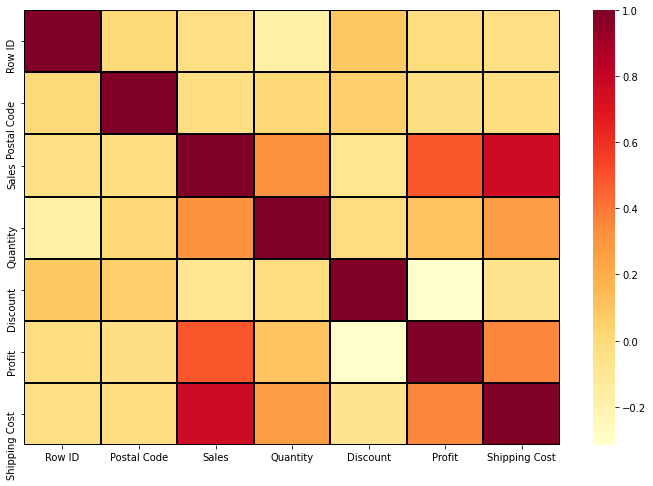

In [10]:
plt.figure(figsize=(12,8))
corr = dataset.corr()
sns.heatmap(corr, cmap='YlOrRd',linewidths=0.1,linecolor='black',annot=False)
plt.show()

### Como esperado, os lucros tem correlação positiva moderada com o valor da venda, leve correlação negativa com o desconto e as vendas tem correlação positiva de moderada a forte com o custo de envio

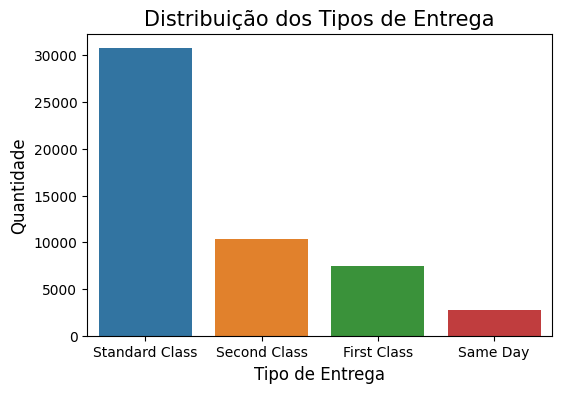

In [11]:
plt.figure(dpi=100)
sns.countplot(data=dataset,x='Ship Mode')
plt.title('Distribuição dos Tipos de Entrega',fontsize=15)
plt.xlabel('Tipo de Entrega',fontsize=12)
plt.ylabel('Quantidade',fontsize=12)
plt.show()

### O tipo de entrega mais comum é o padrão e pode necessitar balanceamento, caso precise de alguma técnica mais avançada

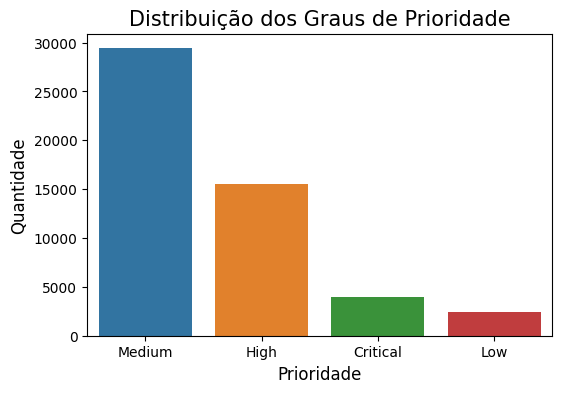

In [12]:
plt.figure(dpi=100)
sns.countplot(data=dataset,x='Order Priority')
plt.title('Distribuição dos Graus de Prioridade',fontsize=15)
plt.xlabel('Prioridade',fontsize=12)
plt.ylabel('Quantidade',fontsize=12)
plt.show()

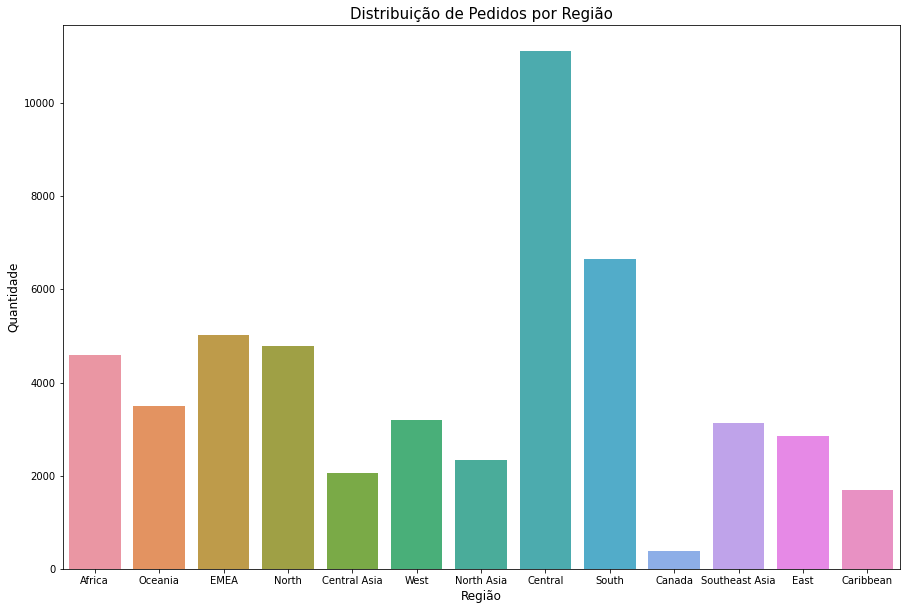

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(data=dataset,x='Region')
plt.title('Distribuição de Pedidos por Região',fontsize=15)
plt.xlabel('Região',fontsize=12)
plt.ylabel('Quantidade',fontsize=12)
plt.show()

### As regiões tem distribuição quase uniforme de entregas, exceto por regiões isoladas

# **Segmentação dos dados**

In [14]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

### Criando um DataFrame com os dados de venda e lucro por País

### Analisando Vendas e Lucro Total por País

In [15]:
# Analisando somente os países, lucro e vendas
venda_lucro_total_pais = dataset[['Country','Sales','Profit']].groupby('Country').sum()
venda_lucro_total_pais.reset_index(inplace=True)
venda_lucro_total_pais.head()

,Country,Sales,Profit
0,Afghanistan,21673.32000,5460.30000
1,Albania,3888.12000,709.32000
2,Algeria,36091.59000,9106.50000
3,Angola,25554.00000,6494.97000
4,Argentina,57511.78328,-18693.79672


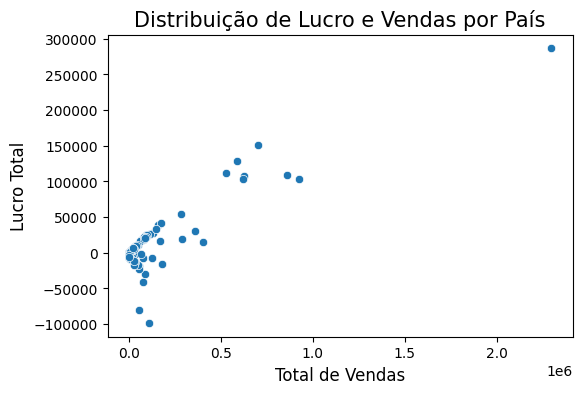

In [16]:
plt.figure(dpi=100)
sns.scatterplot(data = venda_lucro_total_pais,x='Sales',y='Profit')
plt.title('Distribuição de Lucro e Vendas por País',fontsize=15)
plt.xlabel('Total de Vendas',fontsize=12)
plt.ylabel('Lucro Total',fontsize=12)
plt.show()

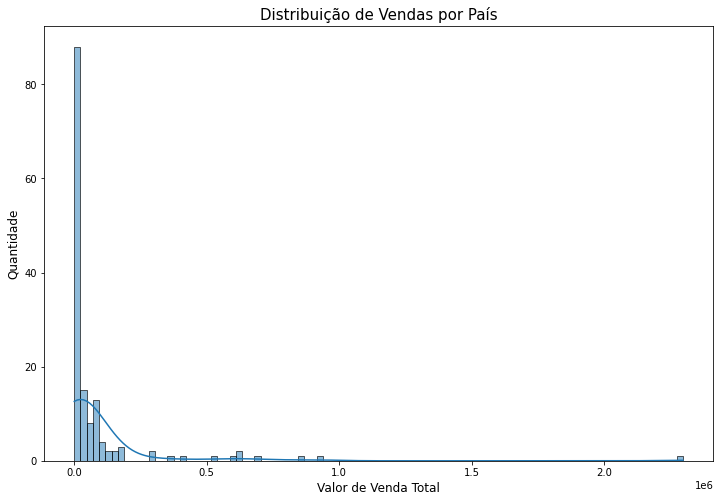

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(data = venda_lucro_total_pais,x='Sales',kde=True)
plt.title('Distribuição de Vendas por País',fontsize=15)
plt.xlabel('Valor de Venda Total',fontsize=12)
plt.ylabel('Quantidade',fontsize=12)
plt.show()

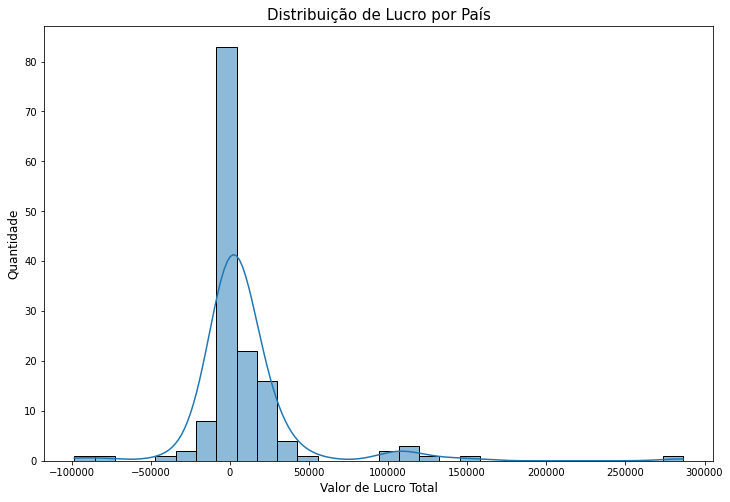

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(data = venda_lucro_total_pais,x='Profit',kde=True,bins=30)
plt.title('Distribuição de Lucro por País',fontsize=15)
plt.xlabel('Valor de Lucro Total',fontsize=12)
plt.ylabel('Quantidade',fontsize=12)
plt.show()

### Distribuições aproximadamente normais, então faz sentido utilizar a normalização

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = venda_lucro_total_pais.values[:,1:] #Group by Country .sum()
sc = StandardScaler()

X_sc = sc.fit_transform(X)

In [20]:
# K-means Training
Kmax = 20
n_clusters_range = np.arange(1,Kmax+1,step=1,dtype=int) #Número de Clusters utilizados
wscc_total = np.zeros(Kmax) #Quadrados das distancias intra-cluster
for i in range(0,Kmax):
    kmeans_clusters_total = KMeans(n_clusters=n_clusters_range[i],init='k-means++',random_state=42)
    kmeans_clusters_total.fit(X_sc)
    wscc_total[i] = kmeans_clusters_total.inertia_

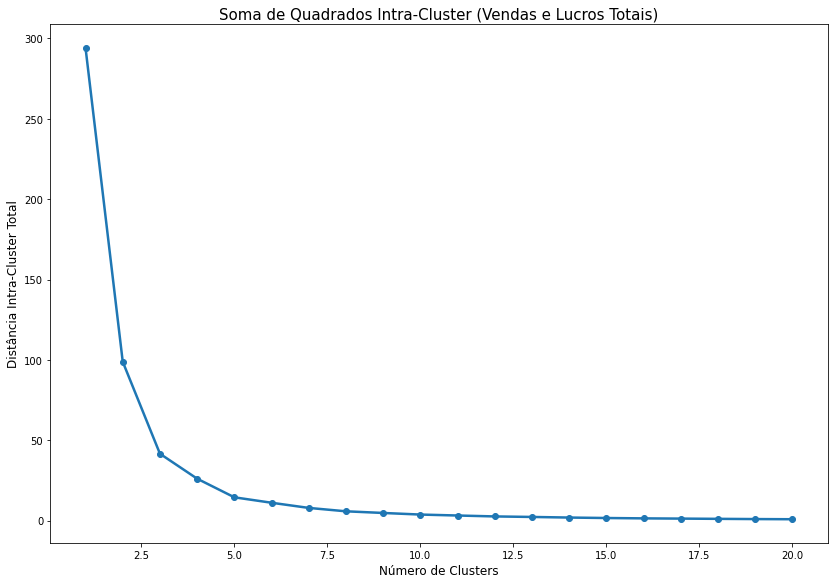

In [21]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.9,.9])
ax.plot(n_clusters_range,wscc_total,lw=2.5,marker='o',label='WSCC')
plt.title('Soma de Quadrados Intra-Cluster (Vendas e Lucros Totais)',fontsize=15)
plt.xlabel('Número de Clusters',fontsize=12)
plt.ylabel('Distância Intra-Cluster Total',fontsize=12)
plt.show()

### Aparentemente a melhor escolha é de 5 Clusters, visto que para mais de 5 a variância intra-cluster tende a ser maior

In [22]:
kmeans_clusters_total = KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans_clusters_total.fit(X_sc)
y_kmeans = kmeans_clusters_total.labels_ # Classificando os agrupamentos

In [23]:
y_kmeans = pd.Series(y_kmeans,name='Cluster Total Sales/Profit') # Transformando para Series

In [51]:
# Labeling Clusters
Country_clustering_total = pd.concat([venda_lucro_total_pais.loc[:,'Country'],y_kmeans],axis=1) # DataFrame de Países e Clusters
Country_clustering_total['Cluster Total Sales/Profit'] = Country_clustering_total['Cluster Total Sales/Profit'].apply(lambda x:'Cluster ' + str(x+1)) # Nomeando os Clusters

Country_clustering_total.set_index('Country',inplace=True) # Transformando os países em índice
Country_clustering_total.head()

,Cluster Total Sales/Profit
Country,
Afghanistan,Cluster 1
Albania,Cluster 1
Algeria,Cluster 1
Angola,Cluster 1
Argentina,Cluster 1


In [25]:
dataset2 = dataset.copy()
dataset2['Cluster Total Sales/Profit'] = np.nan # Entra com valores nulos nessa nova coluna

# Labeling Dataset
dataset2['Cluster Total Sales/Profit'] = dataset2['Country'].apply(lambda x:Country_clustering_total.loc[x,'Cluster Total Sales/Profit']) # Nomeia os clusters no dataset

In [26]:
dataset2.to_csv('superstore_dataset2011-2015_Segmented.csv',index=False,encoding='utf-8') # Salva os novos dados consolidados

In [27]:
dataset = pd.read_csv('superstore_dataset2011-2015_Segmented.csv') # Reutiliza os dados

In [28]:
dataset.loc[:,['Sales','Profit','Cluster Total Sales/Profit']].groupby(by='Cluster Total Sales/Profit').sum() # Tabela de vendas e Lucro por Cluster

,Sales,Profit
Cluster Total Sales/Profit,,
Cluster 1,1.846425e+06,-7408.09506
Cluster 2,2.297201e+06,286397.02170
Cluster 3,4.854386e+06,814732.42402
Cluster 4,3.404116e+06,594003.96562
Cluster 5,2.403732e+05,-220268.02500


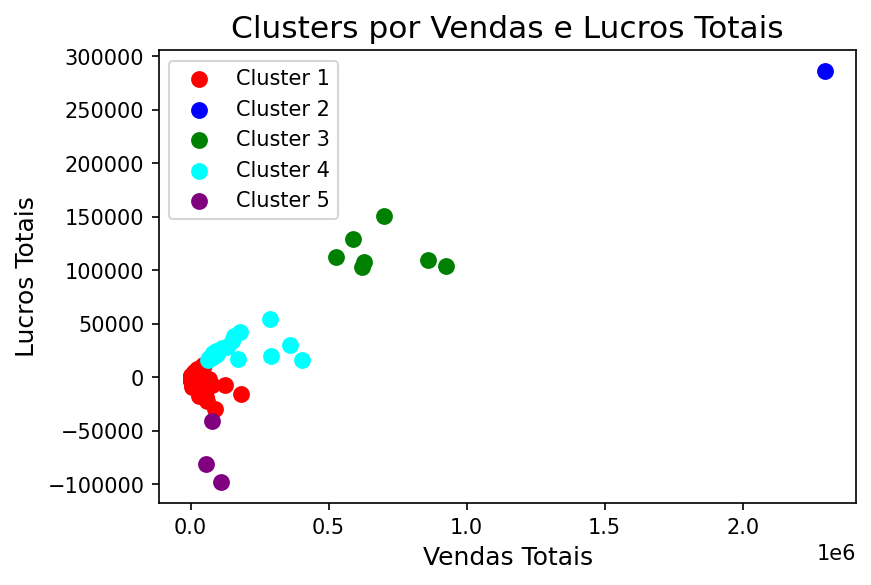

In [29]:
plt.figure(dpi=150)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'purple', label = 'Cluster 5')


plt.title("Clusters por Vendas e Lucros Totais",fontsize=15)
plt.xlabel('Vendas Totais',fontsize=12)
plt.ylabel('Lucros Totais',fontsize=12)
plt.legend()
plt.show()

### Vemos que os elementos do Cluster 1 e Cluster 5 tem lucro negativo, por isso devemos olhar com cuidado para esses países, verificando se está alinhado com a estratégia de negócio e se há alguma maneira de reduzir as despesas

In [30]:
Country_clustering_total[Country_clustering_total['Cluster Total Sales/Profit'] == 'Cluster 1']

,Cluster Total Sales/Profit
Country,
Afghanistan,Cluster 1
Albania,Cluster 1
Algeria,Cluster 1
Angola,Cluster 1
Argentina,Cluster 1
...,...
Venezuela,Cluster 1
Vietnam,Cluster 1
Yemen,Cluster 1


# **Impactos das Variáveis sobre as vendas**

### Vamos primeiramente verificar quais variáveis são realmente importantes para ajustar um modelo de regressão

### O modelo será um modelo de previsão do valor da venda a partir das features selecionadas, para então medir os impactos de cada variável sobre o valor de venda

### Visto que as informações pessoais do cliente, os IDs dos pedidos, o código postal, a Cidade e o Estado são pouco relevantes para a análise global das vendas, estes serão omitidos da análise

In [31]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority',
       'Cluster Total Sales/Profit'],
      dtype='object')

In [32]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Cluster Total Sales/Profit
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,Cluster 1
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,Cluster 3
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,Cluster 1
3,11731,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,Cluster 1
4,22255,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,Cluster 3


In [33]:
print('Category: ',dataset['Category'].unique())
print('Ship Mode: ',dataset['Ship Mode'].unique())
print('Sub-Category: ',dataset['Sub-Category'].unique())
print('Order Priority: ',dataset['Order Priority'].unique())
print('Segment: ',dataset['Segment'].unique())

Category:  ['Office Supplies' 'Furniture' 'Technology']
Ship Mode:  ['Standard Class' 'Second Class' 'First Class' 'Same Day']
Sub-Category:  ['Storage' 'Supplies' 'Paper' 'Furnishings' 'Copiers' 'Bookcases'
 'Appliances' 'Art' 'Accessories' 'Binders' 'Labels' 'Envelopes' 'Chairs'
 'Machines' 'Tables' 'Phones' 'Fasteners']
Order Priority:  ['Medium' 'High' 'Critical' 'Low']
Segment:  ['Consumer' 'Home Office' 'Corporate']


### **Category**: Categórica não ordinal (One-Hot Encoding)
### **Ship Mode**: Categórica ordinal ou não ordinal, porém sem informações sobre a ordem devemos tratar como não ordinal (One-Hot Encoding)
### **Sub-Category**: Categórica não ordinal (One-Hot Encoding, mas possivelmente excluída do modelo)
### **Order Priority**: Categórica ordinal (Ordem)
### **Segment**: Categórica não ordinal (One-Hot Encoding)

In [34]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority',
       'Cluster Total Sales/Profit'],
      dtype='object')

### Salvando somente as variáveis para a regressão

In [35]:
dataset2 = dataset[['Ship Mode', 'Segment',
       'Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority']]
dataset2.to_csv('superstore_dataset2011-2015_regression_model.csv',index_label=False)


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dataset = pd.read_csv('superstore_dataset2011-2015_regression_model.csv')
dataset.head()

,Ship Mode,Segment,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Standard Class,Consumer,Office Supplies,408.300,2,0.0,106.140,35.46,Medium
1,Standard Class,Consumer,Office Supplies,120.366,3,0.1,36.036,9.72,Medium
2,Second Class,Consumer,Office Supplies,66.120,4,0.0,29.640,8.17,High
3,Second Class,Home Office,Office Supplies,44.865,3,0.5,-26.055,4.82,High
4,Standard Class,Consumer,Furniture,113.670,5,0.1,37.770,4.70,Medium


In [2]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

ct = ColumnTransformer(transformers=[('Ship Mode: ',OneHotEncoder(drop='first'),[0]),# Drop='first' para retirar o efeito das correlações e queda do posto da matriz
                                    ('Segment: ',OneHotEncoder(drop='first'),[1]),
                                    ('Category: ',OneHotEncoder(drop='first'),[2]),
                                    ('Order Priority: ',OrdinalEncoder(categories=[['Low','Medium','High','Critical']]),[8])],
                                    remainder='passthrough') # Passthrough para manter colunas não transformadas


array_encoded = ct.fit_transform(dataset)
array_encoded

array([[ 0.0000e+00,  0.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         1.0614e+02,  3.5460e+01],
       [ 0.0000e+00,  0.0000e+00,  1.0000e+00, ...,  1.0000e-01,
         3.6036e+01,  9.7200e+00],
       [ 0.0000e+00,  1.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         2.9640e+01,  8.1700e+00],
       ...,
       [ 0.0000e+00,  1.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.2360e+01,  3.5000e-01],
       [ 0.0000e+00,  0.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         5.6000e-01,  2.0000e-01],
       [ 0.0000e+00,  0.0000e+00,  1.0000e+00, ...,  2.0000e-01,
        -6.0480e-01,  1.7000e-01]])

In [3]:
# Ordem das colunas em array_encoded
columns_dataset = [#'Ship Mode: First Class',
 'Ship Mode: Same Day',
 'Ship Mode: Second Class',
 'Ship Mode: Standard Class',
 #'Segment: Consumer',
 'Segment: Corporate',
 'Segment: Home Office',
 #'Category: Furniture',
 'Category: Office Supplies',
 'Category: Technology',
 'Order Priority',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost']

# Ordem das colunas de features
columns_input = [#'Ship Mode: First Class',
 'Ship Mode: Same Day',
 'Ship Mode: Second Class',
 'Ship Mode: Standard Class',
 #'Segment: Consumer',
 'Segment: Corporate',
 'Segment: Home Office',
 #'Category: Furniture',
 'Category: Office Supplies',
 'Category: Technology',
 'Order Priority',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost']

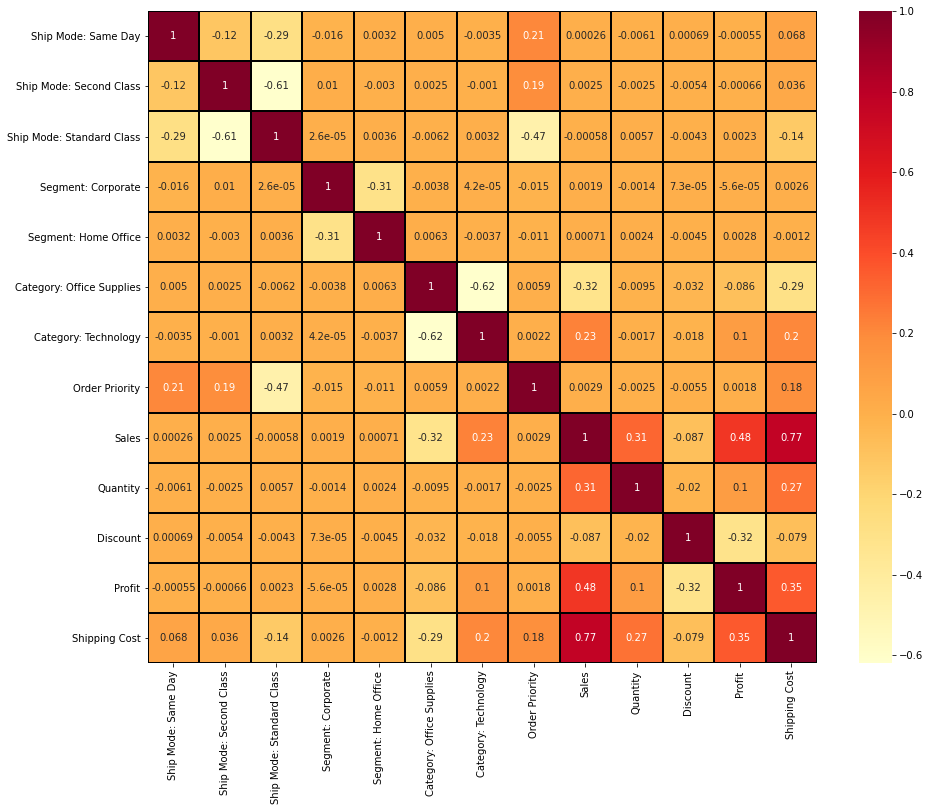

In [4]:
plt.figure(figsize=(15,12))
dataset_transformed = pd.DataFrame(array_encoded,columns=columns_dataset)
sns.heatmap(dataset_transformed.corr(),cmap='YlOrRd',annot=True,linewidths=1.5,linecolor='black')
plt.show()

### Devido ao relativamente pequeno número de variáveis, para ter uma noção geral sobre qual modelo de regressão é melhor, filtramos as variáveis por maiores correlações e treinamos

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform,uniform
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


########################### Linear Regression ####################################

# Modelos lineares
Lasso_linear_model = Lasso(max_iter=15000,random_state=42)
Ridge_linear_model = Ridge(max_iter=15000,random_state=42)
Elastic_Net_linear_model = ElasticNet(max_iter=15000,random_state=42)

# Distribuições para os hiperparâmetros
distributions = dict(alpha=loguniform(1e-5,1e2))
distributions_Elastic_Net = dict(alpha=loguniform(1e-5,1e3),l1_ratio=uniform(0,1))

# Randomized Search Grid para Cross-Validation
random_search_Lasso = RandomizedSearchCV(Lasso_linear_model,param_distributions=distributions,n_iter=100,random_state=42)
random_search_Ridge = RandomizedSearchCV(Ridge_linear_model,param_distributions=distributions,n_iter=100,random_state=42)
random_search_Elastic_Net = RandomizedSearchCV(Elastic_Net_linear_model,param_distributions=distributions_Elastic_Net,n_iter=100,random_state=42)



########################### Decision Tree ####################################


# Modelo de árvore de decisão
decision_tree = DecisionTreeRegressor(random_state=42)

# Listas de hiperparâmetros
max_depth = list(range(1,20))
splitter = ['best','random']
distributions = dict(max_depth=max_depth,
                    splitter=splitter)

# Randomized Search Grid para Cross-Validation
random_search_Decision = RandomizedSearchCV(decision_tree,param_distributions=distributions,n_iter=15,random_state=42)


########################### Random Forest ####################################


# Modelo de árvore de decisão
random_forest = RandomForestRegressor(random_state=42)

# Listas de hiperparâmetros
max_depth = list(range(1,20))
distributions = dict(max_depth=max_depth)

# Randomized Search Grid para Cross-Validation
random_search_random_forest = RandomizedSearchCV(random_forest,param_distributions=distributions,n_iter=10,random_state=42)



######################## Extract Features ##########################
for i in range(len(columns_input)):
    if columns_dataset[i] == 'Sales':
        break 

X = array_encoded[:,:i]
X = np.concatenate((X,array_encoded[:,i+1:]),axis=1) # X é a array_encoded retirando a variável vendas
y = array_encoded[:,i:i+1]


# MinMaxScaler foi utilizado para facilitar o treinamento e também não altera a codificação one-hot
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

# Train - Test 80% - 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# X scaled
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

# y (Vendas) scaled
y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)


########################### Loop ####################################

# Random Search de cada um dos modelos
Random_search = {'Lasso':random_search_Lasso,
                'Ridge':random_search_Ridge,
                'Elastic':random_search_Elastic_Net,
                'Decision':random_search_Decision,
                'Random_Forest':random_search_random_forest}

# Melhores parâmetros e Resultados
Best_parameters = {} # Melhores parâmetros para cada iteração
Parameters = {} # Hiperparâmetros selecionados
Results = {} # Resultados


m_train = len(y_train)
m_test = len(y_test)

for k in range(1,12+1):
    ############################# Feature Selection ##################################
    
    # Seleciona as melhores correlações (f_regression) para cada k
    fs = SelectKBest(score_func=f_regression, k=k)

    X_train_sc_features =fs.fit_transform(X_train_sc, y_train_sc[:,0])
    X_test_sc_features =fs.transform(X_test_sc) 

    # Correlação se mantém por escala
    X_train_features =fs.transform(X_train_sc, y_train[:,0])
    X_test_features =fs.transform(X_test)

    ############ model loop´################
    for s in ['Lasso','Ridge','Elastic','Decision','Random_Forest']:
        # Random Grid Search CV
        model_random_search = Random_search[s]
        model_random_search.fit(X_train_sc_features,y_train_sc[:,0])
        # Predição (y_sc) e inverte sc_y 
        y_pred = sc_y.inverse_transform(model_random_search.predict(X_test_sc_features).reshape(m_test,1))
        # Entra hiperparâmetros selecionados
        Best_parameters = model_random_search.best_params_
        # Atualiza o modelo + número de features com os melhores parâmetros
        Parameters.update({s + ' ' + str(k):Best_parameters})
        # Atualiza o modelo + número de features  com as preformances correspondentes
        Results.update({s + ' ' + str(k):{'RMSE':np.sqrt(mean_squared_error(y_test,y_pred)),
                                        'MAE':mean_absolute_error(y_test,y_pred),
                                        'R2':r2_score(y_test,y_pred),
                                        'CV_score':model_random_search.best_score_}})

In [7]:
# Hiperparâmetros para cada seleção de variáveis
Parameters

{'Lasso 1': {'alpha': 1.0930872279404518e-05},
 'Ridge 1': {'alpha': 0.6160715952774543},
 'Elastic 1': {'alpha': 1.5971768764426223e-05,
  'l1_ratio': 0.10789142699330445},
 'Decision 1': {'splitter': 'best', 'max_depth': 3},
 'Random_Forest 1': {'max_depth': 4},
 'Lasso 2': {'alpha': 1.0930872279404518e-05},
 'Ridge 2': {'alpha': 0.2903369428128563},
 'Elastic 2': {'alpha': 1.5971768764426223e-05,
  'l1_ratio': 0.10789142699330445},
 'Decision 2': {'splitter': 'best', 'max_depth': 5},
 'Random_Forest 2': {'max_depth': 9},
 'Lasso 3': {'alpha': 1.0930872279404518e-05},
 'Ridge 3': {'alpha': 0.2903369428128563},
 'Elastic 3': {'alpha': 1.5971768764426223e-05,
  'l1_ratio': 0.10789142699330445},
 'Decision 3': {'splitter': 'best', 'max_depth': 7},
 'Random_Forest 3': {'max_depth': 9},
 'Lasso 4': {'alpha': 1.0930872279404518e-05},
 'Ridge 4': {'alpha': 0.2903369428128563},
 'Elastic 4': {'alpha': 1.5971768764426223e-05,
  'l1_ratio': 0.10789142699330445},
 'Decision 4': {'splitter': 'be

In [8]:
# Resultados de cada seleção de variáveis
Results_dataframe = pd.DataFrame(Results.values(),index=Results.keys())
Results_dataframe[Results_dataframe['CV_score']>0.7]

,RMSE,MAE,R2,CV_score
Decision 2,328.542244,104.060666,0.585270,0.765896
Random_Forest 2,304.370007,88.106004,0.644052,0.795292
Decision 3,327.618302,95.309437,0.587599,0.773405
Random_Forest 3,304.552566,86.988799,0.643624,0.796557
Decision 4,324.061378,93.667919,0.596505,0.782567
Random_Forest 4,300.449335,84.460950,0.653163,0.808884
Decision 5,324.061378,93.667919,0.596505,0.786457
Random_Forest 5,301.046813,84.483852,0.651782,0.809426
Decision 6,328.575805,94.035680,0.585185,0.786580
Random_Forest 6,297.205546,81.196015,0.660611,0.815695


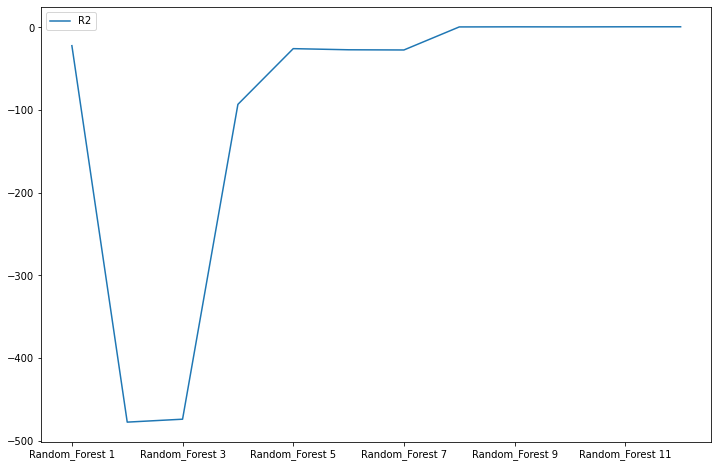

In [44]:
# Plota os valores de R2 para florestas aleatórias e cada número de variáveis selecionadas
random_forest_index = []
for i in range(1,12 + 1):
    random_forest_index.append('Random_Forest ' + str(i))

plt.figure(figsize=(12,8))
Results_dataframe.loc[random_forest_index,'R2'].plot(y='R2',kind='line')
plt.legend()
plt.show()

### Além disso, a princípio de maneira geral o melhor modelo é random forest com profundidade máxima de 7 splits

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform,uniform
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs





########################### Random Forest ####################################


random_forest = RandomForestRegressor(max_depth=7, random_state=42)





######################## Extract Features ##########################
for i in range(len(columns_input)):
    if columns_dataset[i] == 'Sales':
        break 

X = array_encoded[:,:i]
X = np.concatenate((X,array_encoded[:,i+1:]),axis=1) # X é a array_encoded retirando a variável vendas
y = array_encoded[:,i:i+1]


# MinMaxScaler foi utilizado para facilitar o treinamento e também não altera a codificação one-hot
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

# Train - Test 80% - 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# X scaled
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

# y (Vendas) scaled
y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)




########################### Loop ####################################
# Forward Selection para random forest com performance R2
sfs1 = sfs(random_forest,k_features=7,forward=True,verbose=12,scoring='r2')
# Escolha de features por Forward Selection
X_train_sc_features = sfs1.fit_transform(X_train_sc,y_train_sc[:,0])
X_test_sc_features = sfs1.transform(X_test_sc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   25.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [48]:
# Performance (cross-validation) para cada número de features selecionadas
feature_selection = pd.DataFrame(sfs1.subsets_).T
feature_selection

,feature_idx,cv_scores,avg_score,feature_names
1,"(10,)","[0.6475264842158357, 0.7113570782838349, 0.669...",0.662433,"(10,)"
2,"(10, 11)","[0.8097526103190978, 0.810495483560946, 0.8054...",0.797587,"(10, 11)"
3,"(7, 10, 11)","[0.8700869191217366, 0.8465228645782629, 0.841...",0.846493,"(7, 10, 11)"
4,"(2, 7, 10, 11)","[0.8789789529868307, 0.8539259769819486, 0.849...",0.856188,"(2, 7, 10, 11)"
5,"(2, 6, 7, 10, 11)","[0.8797987658242037, 0.8548968790924452, 0.850...",0.858049,"(2, 6, 7, 10, 11)"
6,"(1, 2, 6, 7, 10, 11)","[0.879541184114878, 0.8540234917842701, 0.8517...",0.85799,"(1, 2, 6, 7, 10, 11)"
7,"(1, 2, 5, 6, 7, 10, 11)","[0.8795001914625622, 0.8553411860760604, 0.851...",0.858067,"(1, 2, 5, 6, 7, 10, 11)"


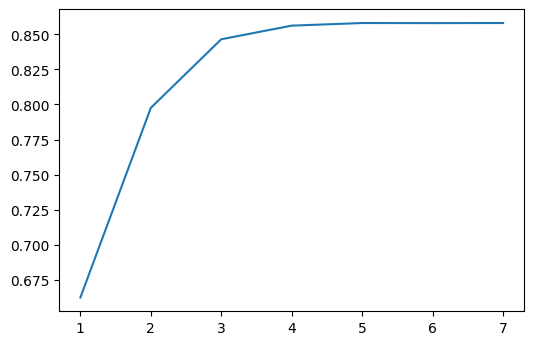

In [49]:
# Features Selecionadas pelo método Elbow
fig = plt.figure(dpi =100)
plt.plot(feature_selection['avg_score'])
plt.show()

### Vemos que 3 ou 4 features seriam a melhor combinação de modo a evitar overffiting

In [52]:
selected_features = []
selected_features_index = [2, 7, 9, 10, 11] 
for i in range(len(selected_features_index)):
    selected_features.append(columns_input[selected_features_index[i]])
selected_features

['Ship Mode: Standard Class',
 'Order Priority',
 'Discount',
 'Profit',
 'Shipping Cost']

### As features selecionadas por Forward Selection foram ``['Ship Mode: Standard Class', 'Order Priority',  'Profit',  'Shipping Cost']``

In [53]:
#Selected Features ['Ship Mode: Standard Class', 'Order Priority', 'Profit', 'Shipping Cost']
X_train_sc_features = X_train_sc[:,[2, 7, 10, 11]]
X_test_sc_features = X_test_sc[:,[2, 7, 10, 11]]
m_test = len(y_test_sc)
random_forest.fit(X_train_sc_features,y_train_sc[:,0])
y_pred = sc_y.inverse_transform(random_forest.predict(X_test_sc_features).reshape(m_test,1))
{'RMSE':np.sqrt(mean_squared_error(y_pred,y_test)),
                                    'MAE':mean_absolute_error(y_pred,y_test),
                                    'R2':r2_score(y_test,y_pred)}

{'RMSE': 281.50982494901007, 'MAE': 71.7094673735266, 'R2': 0.6955118060796169}

### Para comparar Shipping Cost com Discount selecionamos ``['Ship Mode: Standard Class', 'Order Priority',  'Discount',  'Profit',  'Shipping Cost']``

In [54]:
#Selected Features ['Ship Mode: Standard Class', 'Order Priority', 'Discount', 'Profit', 'Shipping Cost']
X_train_sc_features = X_train_sc[:,[2, 7, 9, 10, 11]]
X_test_sc_features = X_test_sc[:,[2, 7, 9, 10, 11]]
m_test = len(y_test_sc)
random_forest.fit(X_train_sc_features,y_train_sc[:,0])
y_pred = sc_y.inverse_transform(random_forest.predict(X_test_sc_features).reshape(m_test,1))
{'RMSE':np.sqrt(mean_squared_error(y_pred,y_test)),
                                    'MAE':mean_absolute_error(y_pred,y_test),
                                    'R2':r2_score(y_test,y_pred)}

{'RMSE': 280.1227968374823, 'MAE': 71.41559544943061, 'R2': 0.6985049040557434}

### Porém a Seleção do 'Ship Mode: Standard Class' não faz tanto sentido por si só, logo presumo que seja efeito do desbalanceamento sobre o random forest ``['Order Priority',  'Discount',  'Profit',  'Shipping Cost']``

In [64]:
selected_features = []
selected_features_index = [7, 9, 10, 11] 
for i in range(len(selected_features_index)):
    selected_features.append(columns_input[selected_features_index[i]])
selected_features

['Order Priority', 'Discount', 'Profit', 'Shipping Cost']

In [60]:
#Selected Features ['Order Priority', 'Discount', 'Profit', 'Shipping Cost']
X_train_sc_features = X_train_sc[:,[ 7, 9, 10, 11]]
X_test_sc_features = X_test_sc[:,[ 7, 9, 10, 11]]
X_train_features = X_train[:,[ 7, 9, 10, 11]]
X_test_features = X_test[:,[ 7, 9, 10, 11]]
m_test = len(y_test_sc)
random_forest.fit(X_train_sc_features,y_train_sc[:,0])
y_pred = sc_y.inverse_transform(random_forest.predict(X_test_sc_features).reshape(m_test,1))

## Performance
{'RMSE':np.sqrt(mean_squared_error(y_pred,y_test)),
                                    'MAE':mean_absolute_error(y_pred,y_test),
                                    'R2':r2_score(y_test,y_pred)}

{'RMSE': 282.3255911537438, 'MAE': 73.36119250499186, 'R2': 0.6937445421806233}

### Seleção final de variáveis: ``['Order Priority', 'Discount', 'Profit', 'Shipping Cost']``


In [65]:
import shap

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test_sc_features)

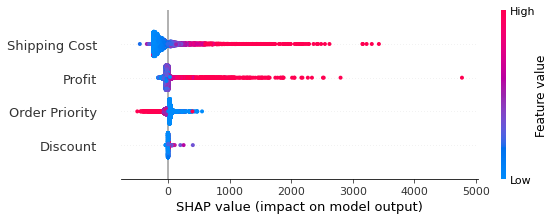

In [66]:
# Shap Values com escala corrigida
shap.summary_plot(shap_values/sc_y.scale_, features=X_test_sc_features, feature_names=selected_features)

### Utilizando a shap library, vemos que o Shipping Cost tem maior impacto sobre o valor das vendas que o Discount

### Maiores valores do Shipping Cost tendem a prever maiores vendas e vice-versa

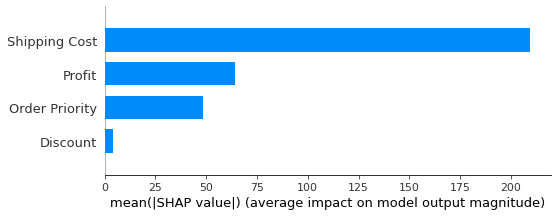

In [67]:
shap.summary_plot(shap_values/sc_y.scale_, features=X_test_sc_features, feature_names=selected_features, plot_type='bar')

### Vemos que $R^2 = 0.69$, um desempenho moderado, e o **Shipping Cost** tem maior impacto sobre essa métrica, medido retreinando cada variável.

### Portanto o Shipping Cost tem maior impacto nas vendas que o Discount.

### Em geral, altos valores para o Shipping Cost tendem a aumentar o valor da venda e baixos valores de Shipping Cost tendem a decrescer o valor da venda.

### O mesmo ocorre para o Profit. Porém o Shipping Cost tem um maior impacto nos valores.

### Como o discount tem pouco impacto sobre o valor de venda, a tendência é que um subsídio sobre o desconto não teria um impacto significativo sobre as vendas

### Além disso, o Shipping Cost alto também pode significar um valor de compra maior, visto que ter um desconto no frete, em geral, implica um maior valor de venda, hipótese validada pelo modelo

In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
dataset = pd.read_csv('superstore_dataset2011-2015_Segmented.csv')

dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Cluster Total Sales/Profit
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,Cluster 1
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,Cluster 3
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,Cluster 1
3,11731,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,Cluster 1
4,22255,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,Cluster 3


In [10]:
# Formatando Datas em Ano e Mês
from datetime import date
def str2monthyear(x):
    split = x.split('-')
    return split[0] + '-' + split[1]
dataset['Order Month'] = dataset['Order Date'].apply(str2monthyear)
time_series = dataset[['Order Month','Sales','Profit']].groupby('Order Month').sum()

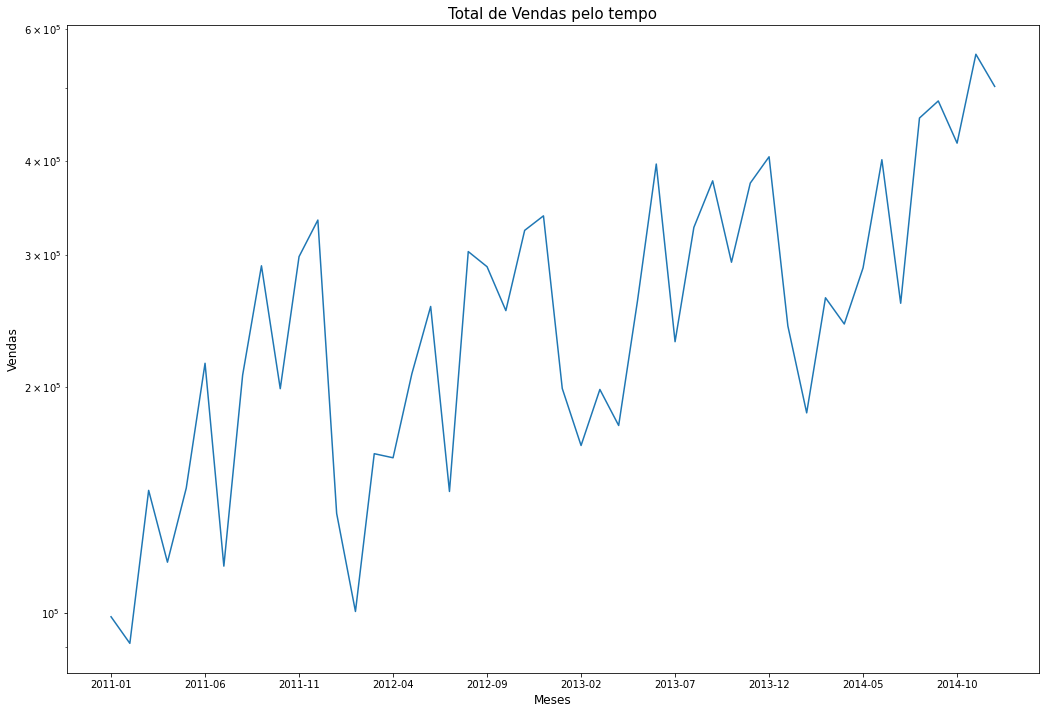

In [11]:
import matplotlib.dates as mdates
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([.1,.1,.9,.9])
ax.plot(time_series['Sales'])
ax.set_yscale('log') # Escala Logarítimica
index_list = [5*i for i in range(len(time_series)//5 + 1)]
plt.xticks(ticks=time_series.index[index_list])
plt.title('Total de Vendas pelo tempo',fontsize=15)
plt.xlabel('Meses',fontsize=12)
plt.ylabel('Vendas',fontsize=12)


# fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.show()

### Dois aspectos importantes desse gráfico são:

### $\bullet$ Vemos que a escala logarítimica transforma os dados em uma reta, aproximadamente, indicando que a escala logarítmica pode ser uma alternativa interessante para este modelo.

### $\bullet$ Vemos um aspecto similar a cada 12 meses, indicando uma sazonalidade.

### Por esses motivos o modelo escolhido para criação das séries temporais foi o Exponetial Smoothing Holt-Winter's.

### Exponential Smoothing Holt-Winter's:

### A previsão é dada por $$F_{t+m} = s_t + m\cdot b_t + c_{t+m} + \varepsilon_{t+m},$$ onde $(c_{t})$ é uma sequência periódica de periodo $L$ fixado e $\varepsilon_{t+m}$ tem distribuição normal com média $0$ e desvio padrão $\sigma_{t+m}$.

### Há também algumas variantes que podem ser selecionadas através dos hiperparâmetros: <https://otexts.com/fpp2/taxonomy.html>


In [12]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel # Exponential Smoothing Holt Winter's
import statsmodels as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit # Cross Validation para Séries Temporais

y = time_series.iloc[:,0]
m = len(y)
index = int(m*.9)
train = y[:index].copy()
test = y[index:].copy()

In [13]:
# Classe para verificar e armazenar o melhor modelo
class forecasting_cv():
    def __init__(self):
        '''
        Chooses the best hyperparameter, model and performance in the cross validation
        '''
        self.best_params = None 
        self.best_performance = None 
        self.best_performance_std = None 
        self.fitted_model = None 
    
    def fit(self,cv_metric_eval,cv_metric_eval_std,hyperparameters,fitted_model):
        '''
        cv_metric_eval: Evaluation of the metric on validation set
        cv_metric_eval_std: Evaluation of the metric on validation set
        hyperparameters: Hyperparameters of the trained model
        fitted_model: Fitted Model
        '''
        if self.best_performance:
            if self.best_performance>metric_eval:
                self.best_performance = metric_eval
                self.best_performance_std = metric_eval_std 
                self.best_params = hyperparameters
                self.fitted_model = fitted_model
        else:
            self.best_performance = metric_eval
            self.best_performance_std = metric_eval_std 
            self.best_params = hyperparameters
            self.fitted_model = fitted_model

### Cross Validation of the Exponential Smoothing

In [14]:
y_pred = test.copy()
train_sc = np.log(train.copy())
test_sc = np.log(test.copy())

# Objeto utilizado apenas para armazenar o melhor modelo e parâmetros
fc_cv = forecasting_cv()

# Parâmetros não automáticos
trends = ['add','mul']
damped_trends = [True,False]
seasonals = ['add','mul']

# 10-fold com dados de teste de tamanho 1
tss = TimeSeriesSplit(n_splits=10,test_size=1)

for trend in trends:
    for damped_trend in damped_trends:
        for seasonal in seasonals:
            # Fixados os parâmetros
            cv_score = []
            for train_index,test_index in tss.split(train):
                cv_train,cv_val = train_sc[train_index],train_sc[test_index]
                # Modelo Exponential Smoothing com sazonalidade de 12 meses
                model = ETSModel(cv_train,trend=trend,damped_trend = damped_trend,seasonal = seasonal,seasonal_periods=12)
                fitted_model = model.fit()
                # Forecasting dos valores
                y_pred = fitted_model.forecast(len(cv_val))
                cv_score.append(mean_absolute_error(np.exp(cv_val),np.exp(y_pred))) # MAE do valor predito na validação (sem escala logarítmica)
            
            model = ETSModel(train_sc,trend=trend,damped_trend = damped_trend,seasonal = seasonal,seasonal_periods=12)
            hyperparameters = dict(trend=trend,damped_trend=damped_trend,seasonal=seasonal)
            fitted_model = model.fit()
            # Avaliando a métrica no conjunto de validação
            metric_eval = np.mean(cv_score)
            metric_eval_std = np.std(cv_score)
            # Verifica o melhor desempenho
            fc_cv.fit(metric_eval,metric_eval_std,hyperparameters,fitted_model)

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Gabriel\AppData\Local\Packages\PythonSof

In [15]:
print('Best Parameters:',fc_cv.best_params)
print('Cross Validated Best Mean:',fc_cv.best_performance,'Cross Validated Std',fc_cv.best_performance_std)
# Forecasting do melhor modelo
y_pred_sc = fc_cv.fitted_model.forecast(len(test))
# Valor predito para o conjunto de teste
y_pred = np.exp(y_pred_sc)
MAPE = mean_absolute_percentage_error(test,y_pred)
MAE = mean_absolute_error(test,y_pred)
RMSE = np.sqrt(mean_squared_error(test,y_pred))
print('RMSE:',RMSE)
print('MAE:',MAE)
print('MAPE:',MAPE)

Best Parameters: {'trend': 'add', 'damped_trend': True, 'seasonal': 'add'}
Cross Validated Best Mean: 22492.47469318426 Cross Validated Std 14523.563922917221
RMSE: 53687.770365934135
MAE: 45854.9003329402
MAPE: 0.09580212714793833


In [16]:
# Previsão desde o primeiro mês até o último mês observado
pred = fc_cv.fitted_model.get_prediction(start=0,end=len(y)-1)
# dataframe com previsão e limites inferior e superior de 95% = 100% - 5% de confiança
summary_dataframe = pred.summary_frame(alpha=0.05)

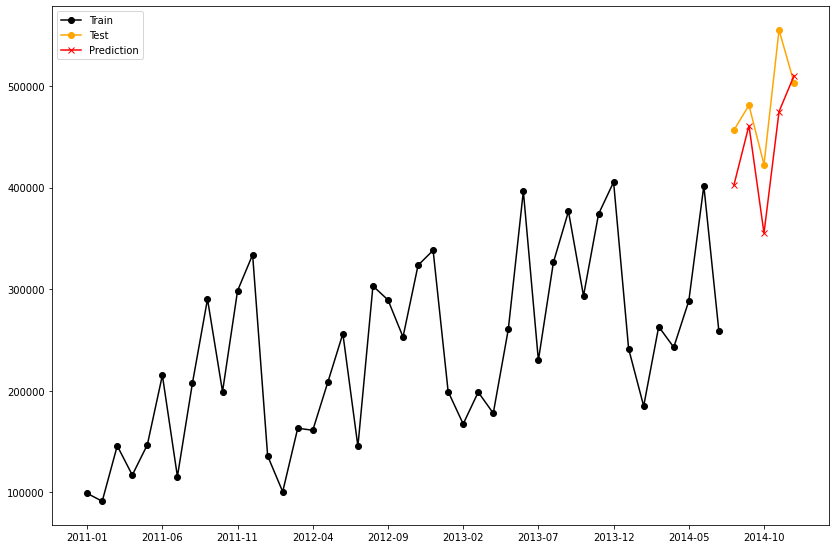

In [17]:
# Treino Teste
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.9,.9])
m = len(test)
index_list = [5*i for i in range(len(y)//5 + 1)]
plt.plot(train.index,train,color='k',marker='o',label = 'Train')
plt.plot(test.index,test,color = 'orange',marker = 'o',label = 'Test')
plt.plot(y.index[-m:],np.exp(summary_dataframe['mean'][-m:]),marker = 'x',color = 'red',label = 'Prediction')
plt.xticks(ticks=y.index[index_list])



# fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.legend()
plt.show()

In [18]:
hyperparameters = fc_cv.best_params
# Treinando o modelo com melhores parâmetros
model = ETSModel(np.log(y),trend=hyperparameters['trend'],damped_trend = hyperparameters['damped_trend'],   
                seasonal = hyperparameters['seasonal'],seasonal_periods=12)
fitted_model = model.fit()
# Previsão desde o primeiro mês até o próximo mês
predict = fitted_model.get_prediction(start=0,end=len(y))
index = list(y.index)
index.append('2015-01')
# dataframe com previsão e limites inferior e superior de 95% = 100% - 5% de confiança
summary_dataframe = predict.summary_frame(alpha=0.05)
summary_dataframe.index = index

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


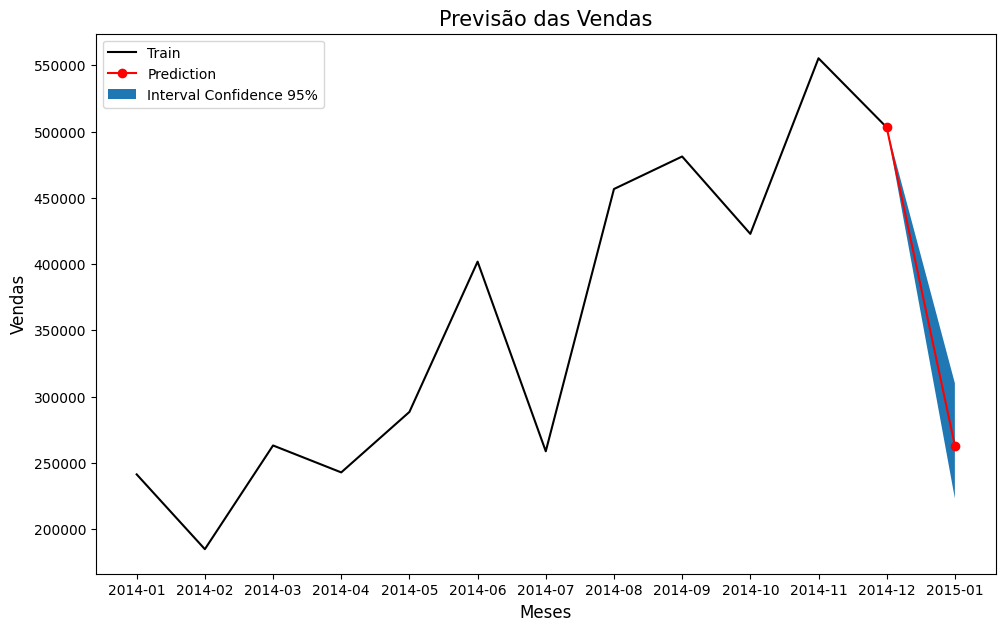

,Mês,Valor Esperado pelo Modelo,Limite Inferior de Confiança,Limite Superior de Confiança
0,2015-01,263031.85,223126.73,310073.81


In [19]:
import matplotlib.dates as mdates
fig = plt.figure(figsize=(10,6),dpi=100)
ax = fig.add_axes([.1,.1,.9,.9])
last_indexes = 12

# Plotagem Previsão e intervalo de confiança de 95%
plt.plot(y.index[-last_indexes:],y[-last_indexes:],color='k',label = 'Train')
plt.plot(summary_dataframe.index[-2:],[y[-1],np.exp(summary_dataframe['mean'])[-1]],color='red',marker='o',label = 'Prediction')
plt.fill_between(x = summary_dataframe.index[-2:],y1 = [y[-1],np.exp(summary_dataframe['pi_lower'])[-1]],
                    y2 = [y[-1],np.exp(summary_dataframe['pi_upper'])[-1]],label='Interval Confidence 95%')
plt.title('Previsão das Vendas',fontsize=15)
plt.xlabel('Meses',fontsize=12)
plt.ylabel('Vendas',fontsize=12)


# fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.legend()
plt.show()

# Previsão e Limites
predicted_values = {'Mês':summary_dataframe.index[-1],
'Valor Esperado pelo Modelo':np.exp(summary_dataframe.iloc[-1,0]),
'Limite Inferior de Confiança':np.exp(summary_dataframe.iloc[-1,1]),
'Limite Superior de Confiança':np.exp(summary_dataframe.iloc[-1,2])}

predicted_values = pd.DataFrame(predicted_values,index=[0])
predicted_values = np.round(predicted_values,2)

predicted_values

### Calculating Prediction Interval Reference: <https://otexts.com/fpp2/ets-forecasting.html>

### O intervalo de predição não está implementado na biblioteca, por isso para resolver o problema utilizei somente o intervalo de confiança.